In [ ]:
import requests
from bs4 import BeautifulSoup
import re


In [ ]:
r = requests.get('https://www.trustpilot.com/review/hp.com')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.reviewContent.')
results = soup.find_all('p',{'class': 'typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn'})
reviews = [result.text for result in results]
reviews

['How is this company still in business? There is surely no other business selling appliances - printers, in my case - which simply do not work. All I ever need to do is print the odd Word document, and every time I need to spend hours, literally hours, looking up what this flashing light means or what that warning means, restarting, trying to print from different computers. I never take the time to review anything but in this case I felt compelled to Google as I felt ‘surely it’s not just me’; and sure enough, one of the lowest Trust Pilot reviews I’ve ever seen. For the sake of your blood pressure, steer well clear of this lot.',
 '-5 stars, HP Envy 6452e. Scanning issues are a nightmare. HP doesn\'t have a fix that lasts longer than a couple weeks maybe a month. Then it\'s back to "tech support" and hours downloading more software. I will never buy another HP printer combo even though I\'ve used their printer/ scanners for 20 + years. Waiting to hear back from customer service for a

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.DataFrame(np.array(reviews), columns=['review'])

In [ ]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [ ]:
data.to_csv('data.csv')

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.rename( columns={'Unnamed: 0':'Id'}, inplace=True )
data.head()

,Id,review
0,0,"How is this company still in business? There is surely no other business selling appliances - printers, in my case - which simply do not work. All I ever need to do is print the odd Word document,..."
1,1,"-5 stars, HP Envy 6452e. Scanning issues are a nightmare. HP doesn't have a fix that lasts longer than a couple weeks maybe a month. Then it's back to ""tech support"" and hours downloading more sof..."
2,2,This is the worst experience that I ever had with a customer support. Incompetence only challenged by laziness and lack of manners. I promised myself not to buy anything HP anymore. Writing about ...
3,3,On Monday 9th January 2023 I bought an HP Deskjet 3720 but the scanner is just horrible. Don't waste your money on garbage like this because it won't print either. On Tuesday 17th January 2023 I h...
4,4,"My computer, which was still under warranty has been with HP for repair for more than 2 months now, waiting for parts; waiting for someone to try to repair it; waiting for someone to agree it need..."


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk
nltk.downloader.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
sia.polarity_scores('i am happy')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [ ]:
result= {}
for i, row in tqdm(data.iterrows(), total=len(data)):
  text = row['review']
  myid = row['Id']
  result[myid] = sia.polarity_scores(text)

vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(data, how='left')
exp = vaders.head()
exp

  0%|          | 0/20 [00:00<?, ?it/s]

,Id,neg,neu,pos,compound,review
0,0,0.087,0.782,0.131,0.7615,"How is this company still in business? There is surely no other business selling appliances - printers, in my case - which simply do not work. All I ever need to do is print the odd Word document,..."
1,1,0.035,0.921,0.044,0.1531,"-5 stars, HP Envy 6452e. Scanning issues are a nightmare. HP doesn't have a fix that lasts longer than a couple weeks maybe a month. Then it's back to ""tech support"" and hours downloading more sof..."
2,2,0.208,0.656,0.136,-0.6124,This is the worst experience that I ever had with a customer support. Incompetence only challenged by laziness and lack of manners. I promised myself not to buy anything HP anymore. Writing about ...
3,3,0.148,0.746,0.106,-0.5422,On Monday 9th January 2023 I bought an HP Deskjet 3720 but the scanner is just horrible. Don't waste your money on garbage like this because it won't print either. On Tuesday 17th January 2023 I h...
4,4,0.047,0.900,0.053,0.1531,"My computer, which was still under warranty has been with HP for repair for more than 2 months now, waiting for parts; waiting for someone to try to repair it; waiting for someone to agree it need..."


In [ ]:
import string 
string.punctuation
punc = string.punctuation
def remove_punc(text):
  return text.translate(str.maketrans('', '', punc)) 
data['review']=data['review'].apply(remove_punc)

import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stopwords.words('english'))

def remove_stopwords(text):
  new_text =[]

  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  x = new_text[:]
  new_text.clear()
  return " ".join(x)

  data['review']=data['review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('punkt')
import re
from nltk.tokenize import word_tokenize, sent_tokenize
def token(text):
  final = word_tokenize(text) 
  filtered_sentence = [w for w in final if not w.lower() in stop_words]
  filtered_sentence = []

  for w in final:
      if w not in stop_words:
          filtered_sentence.append(w)
  return(" ".join(filtered_sentence))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.0 MB/s eta 0:00:00


In [ ]:
!pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=3a8197a7c01567ba5555a5e53ee9c3162872b3417b8b34e9c7e652ef42cfb16b
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
import re
from cleantext import clean
import contractions
import string
def clean_Text(sampleText):
    sampleText=sampleText.lower().replace("_", " ").replace("-", " ").translate(str.maketrans('', '', string.punctuation))
    sampleText=clean(sampleText, no_emoji=True)
    return (contractions.fix(sampleText))

In [ ]:
title_clean=[]
for x in data.review:
    try:
        title_clean.append(token(clean_Text(x)))
    except:
        title_clean.append(np.nan)
    
data['token_review']=data['review'].apply(lambda x: token(x.lower()))

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemm(text):
  for word in text:
    return lemmatizer.lemmatize(text)

nltk.download('wordnet')
data['token_review_lemm']=title_clean

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data['token_review']=data['review'].apply(lemm)
data.head()

,Id,review,token_review,token_review_lemm
0,0,How is this company still in business There is surely no other business selling appliances printers in my case which simply do not work All I ever need to do is print the odd Word document and e...,How is this company still in business There is surely no other business selling appliances printers in my case which simply do not work All I ever need to do is print the odd Word document and e...,company still business surely business selling appliances printers case simply work ever need print odd word document every time need spend hours literally hours looking flashing light means warni...
1,1,5 stars HP Envy 6452e Scanning issues are a nightmare HP doesnt have a fix that lasts longer than a couple weeks maybe a month Then its back to tech support and hours downloading more software I w...,5 stars HP Envy 6452e Scanning issues are a nightmare HP doesnt have a fix that lasts longer than a couple weeks maybe a month Then its back to tech support and hours downloading more software I w...,5 stars hp envy 6452e scanning issues nightmare hp fix lasts longer couple weeks maybe month back tech support hours downloading software never buy another hp printer combo even though used printe...
2,2,This is the worst experience that I ever had with a customer support Incompetence only challenged by laziness and lack of manners I promised myself not to buy anything HP anymore Writing about the...,This is the worst experience that I ever had with a customer support Incompetence only challenged by laziness and lack of manners I promised myself not to buy anything HP anymore Writing about the...,worst experience ever customer support incompetence challenged laziness lack manners promised buy anything hp anymore writing trouble hp support laptop would take several pages overall rubbish hop...
3,3,On Monday 9th January 2023 I bought an HP Deskjet 3720 but the scanner is just horrible Dont waste your money on garbage like this because it wont print either On Tuesday 17th January 2023 I had t...,On Monday 9th January 2023 I bought an HP Deskjet 3720 but the scanner is just horrible Dont waste your money on garbage like this because it wont print either On Tuesday 17th January 2023 I had t...,monday 9th january 2023 bought hp deskjet 3720 scanner horrible waste money garbage like print either tuesday 17th january 2023 return bayswater officeworks happy printer
4,4,My computer which was still under warranty has been with HP for repair for more than 2 months now waiting for parts waiting for someone to try to repair it waiting for someone to agree it needs to...,My computer which was still under warranty has been with HP for repair for more than 2 months now waiting for parts waiting for someone to try to repair it waiting for someone to agree it needs to...,computer still warranty hp repair 2 months waiting parts waiting someone try repair waiting someone agree needs replaced dealer multiple emails hp trying speed decisionmaking clear reluctant repla...


In [ ]:
data['token_review_lemm']

0     company still business surely business selling appliances printers case simply work ever need print odd word document every time need spend hours literally hours looking flashing light means warni...
1     5 stars hp envy 6452e scanning issues nightmare hp fix lasts longer couple weeks maybe month back tech support hours downloading software never buy another hp printer combo even though used printe...
2     worst experience ever customer support incompetence challenged laziness lack manners promised buy anything hp anymore writing trouble hp support laptop would take several pages overall rubbish hop...
3                                  monday 9th january 2023 bought hp deskjet 3720 scanner horrible waste money garbage like print either tuesday 17th january 2023 return bayswater officeworks happy printer
4     computer still warranty hp repair 2 months waiting parts waiting someone try repair waiting someone agree needs replaced dealer multiple emails hp trying speed decisionma

In [ ]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
        ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################
  return [ent1.strip(), ent2.strip()]

In [ ]:
get_entities("the film had 200 patents")

['film', '200  patents']

In [ ]:
entity_pairs = []

for i in tqdm(data["token_review_lemm"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 20/20 [00:00<00:00, 55.19it/s]


In [ ]:
entity_pairs[10:20]

[['far service quality laptop', 'laptop  access'],
 ['ago  printers', 'still head liars'],
 ['good scanner scanner', 'app disaster'],
 ['instant  ink', 'old  depleted'],
 ['circular  process', 'complete rubbish support'],
 ['new customer cartridge', 'stressful customer sort'],
 ['touching night night', 'setting  app'],
 ['obvious premium parts', 'hp sales service pants'],
 ['easy budget function', 'compact availability cartridge laptop'],
 ['previous  experience', 'battery life']]

In [ ]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [ ]:
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target})

NameError: ignored

In [ ]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", create_using=nx.MultiDiGraph())

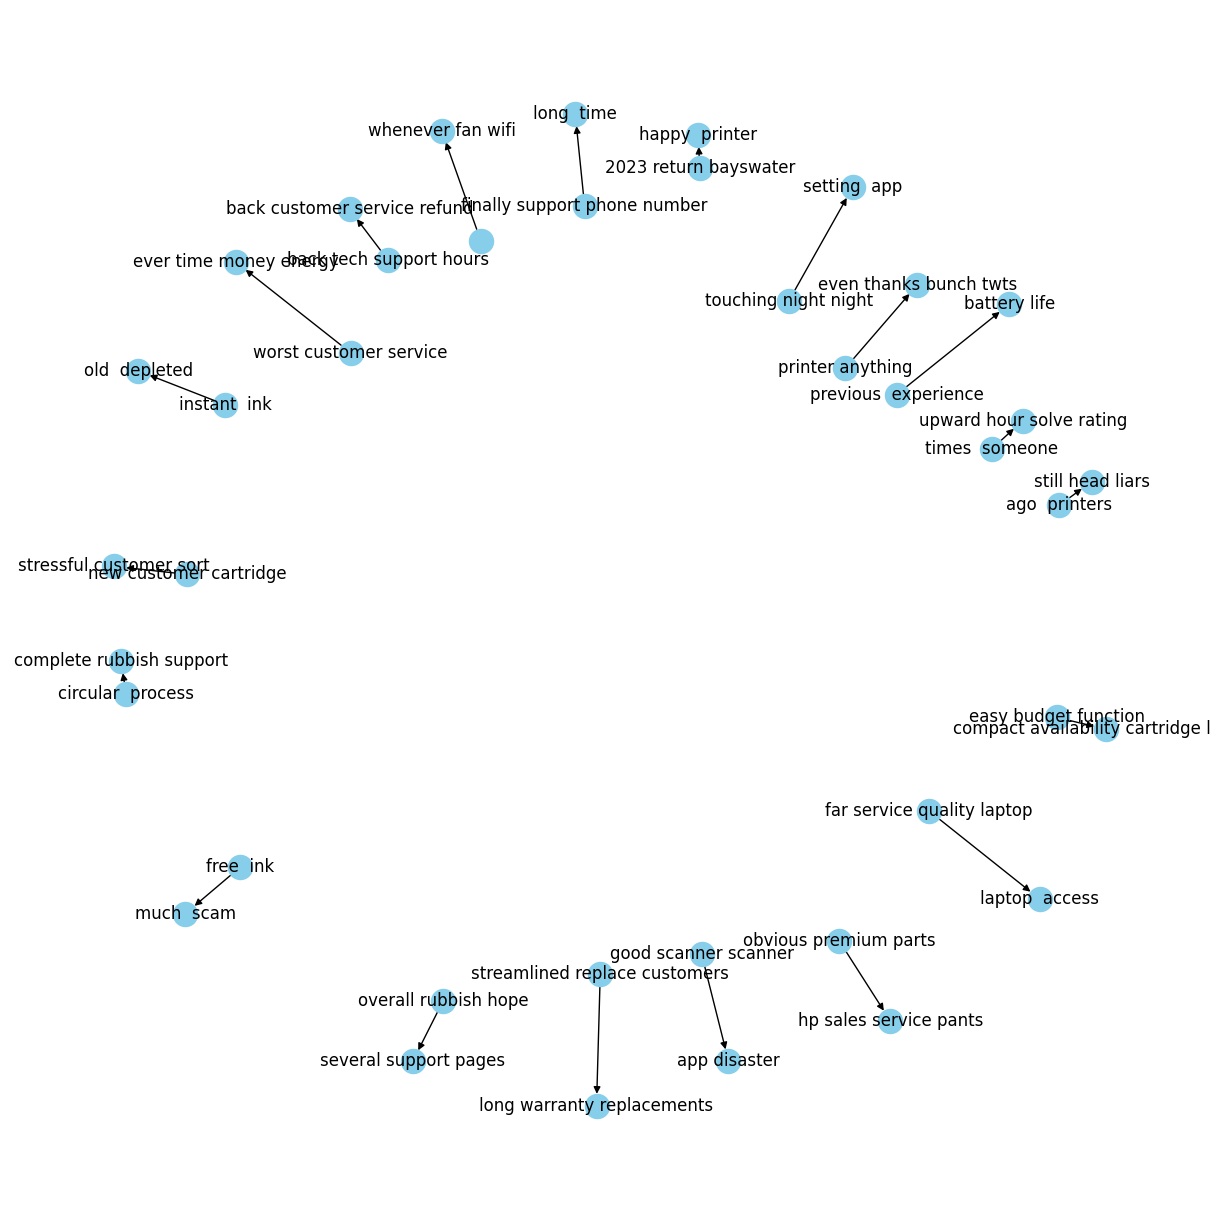

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

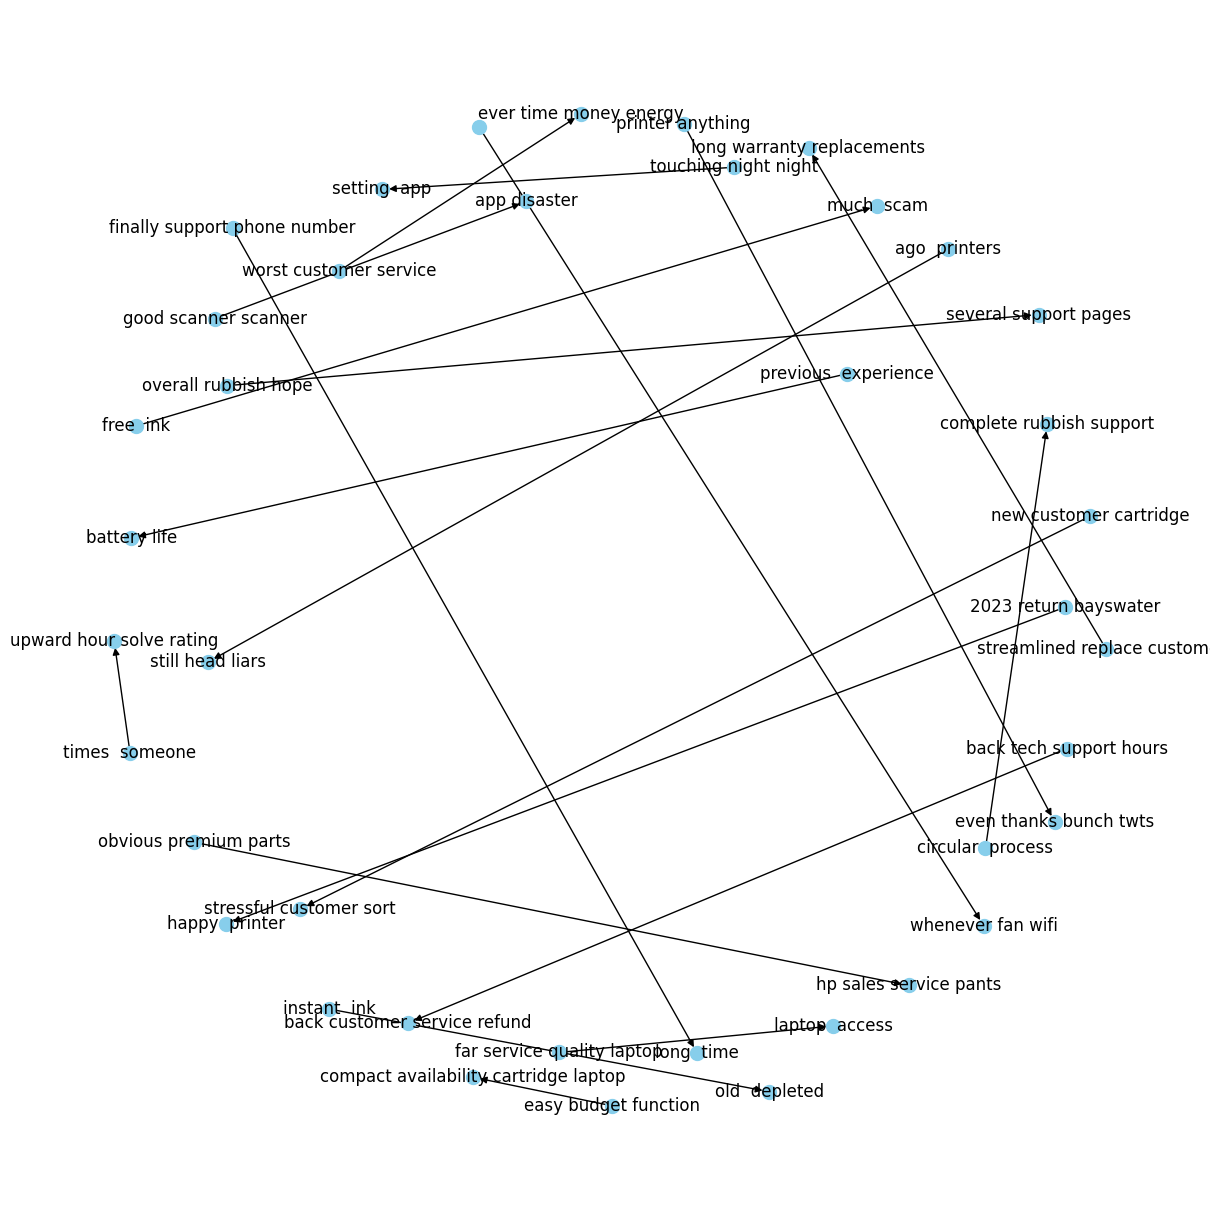

In [ ]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k =2)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=100, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()